In [53]:
# copy x train five times for each model
#different workflow patterns, (pca vs no pca, hyperopt vs no, high dim vs low)
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [54]:
pest_feats_pca

PCA(n_components=18)

### Data preperation

#### Load the data and generate descriptors

In [2]:
pest_data = pd.read_csv("BinaryPesticideData.csv", delimiter=",")
pest_data[0:5]

,Pesticide Name,LOD,EPA Tolerance (ppm),Smiles,ExactMolWt,HeavyAtomMolWt,NumRadicalElectrons,NumValenceElectrons,HeavyAtomCount,NHOHCount,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,Class
0,Procymidone,0.014,NT,CC12CC1(C)C(=O)N(C2=O)c3cc(Cl)cc(Cl)c3,283.016684,273.054,0,94,18,0,...,2.0,0.0,0.0,0.0,2.0,0.0,0.6,1.4,3,1
1,Fenamiphos,0.004,NT,CCO[P](=O)(NC(C)C)Oc1ccc(SC)c(C)c1,303.105801,281.188,0,108,19,1,...,1.0,0.0,0.0,0.0,1.0,2.0,0.8,7.0,10,1
2,Metribuzin,0.030,NT,CSC1=NN=C(C(=O)N1N)C(C)(C)C,214.088832,200.182,0,78,14,2,...,2.0,1.0,0.0,0.0,1.0,2.0,0.6,2.0,3,1
3,Fenamiphos sulfone,0.008,NT,CCO[P](=O)(NC(C)C)Oc1ccc(c(C)c1)[S](C)(=O)=O,335.095630,313.186,0,120,21,1,...,3.0,0.0,0.0,0.0,1.0,1.0,0.8,7.0,10,1
4,Methiocarb,0.043,NT,CNC(=O)Oc1cc(C)c(SC)c(C)c1,225.082350,210.193,0,82,15,1,...,1.0,1.0,0.0,0.0,1.0,1.0,0.6,4.0,10,1


In [3]:
pest_data.tail()

,Pesticide Name,LOD,EPA Tolerance (ppm),Smiles,ExactMolWt,HeavyAtomMolWt,NumRadicalElectrons,NumValenceElectrons,HeavyAtomCount,NHOHCount,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,Class
235,Oxamyl oxime,0.001,T,CSC(=N/O)/C(=O)N(C)C,162.046299,152.134,0,58,10,1,...,2.0,0.0,1.0,0.0,0.0,1.0,0.6,3.0,10,2
236,Pyriproxyfen,0.014,T,CC(COc1ccc(Oc2ccccc2)cc1)Oc3ccccn3,321.136493,302.224,0,122,24,0,...,4.0,0.0,0.0,0.0,3.0,0.0,1.0,7.0,10,2
237,Boscalid,0.001,T,Clc1ccc(cc1)c2ccccc2NC(=O)c3cccnc3Cl,342.032668,331.117,0,114,23,1,...,2.0,1.0,0.0,0.0,3.0,0.0,0.6,4.0,10,2
238,Fenpropathrin,0.026,T,CC1(C)C(C(=O)OC(C#N)c2cccc(Oc3ccccc3)c2)C1(C)C,349.167794,326.246,0,134,26,0,...,3.0,0.0,0.0,0.0,2.0,2.0,1.0,6.6,10,2
239,Carfentrazone ethyl,0.003,T,CCOC(=O)C(Cl)Cc1cc(N2N=C(C)N(C(F)F)C2=O)c(F)cc1Cl,411.036431,398.083,0,142,26,0,...,2.0,0.0,0.0,0.0,2.0,0.0,0.8,7.0,10,2


In [4]:
pest_data.count()

Pesticide Name              240
LOD                         240
EPA Tolerance (ppm)         240
Smiles                      240
ExactMolWt                  240
                           ... 
FeatureHydrophobeCount3D    240
ConformerModelRMSD3D        240
EffectiveRotorCount3D       240
ConformerCount3D            240
Class                       240
Length: 61, dtype: int64

In [5]:
pest_data["Class"].dtype

dtype('int64')

In [6]:
pest_data.columns

Index(['Pesticide Name', 'LOD', 'EPA Tolerance (ppm)', 'Smiles', 'ExactMolWt',
       'HeavyAtomMolWt', 'NumRadicalElectrons', 'NumValenceElectrons',
       'HeavyAtomCount', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles',
       'NumAliphaticHeterocycles', 'NumAliphaticRings',
       'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles',
       'NumSaturatedRings', 'RingCount', 'Halogens', 'MolecularFormula',
       'MolecularWeight', 'CanonicalSMILES', 'XLogP', 'ExactMass', 'TPSA',
       'Complexity', 'Charge', 'HBondDonorCount', 'HBondAcceptorCount',
       'RotatableBondCount', 'HeavyAtomCount.1', 'IsotopeAtomCount',
       'AtomStereoCount', 'DefinedAtomStereoCount', 'UndefinedAtomStereoCount',
       'BondStereoCount', 'DefinedBondStereoCount', 'UndefinedBondStereoCount',
       'CovalentUnitCount', 'Volume3D', 'XStericQu

In [7]:
pest_data.describe()

,LOD,ExactMolWt,HeavyAtomMolWt,NumRadicalElectrons,NumValenceElectrons,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,Class
count,240.000000,240.000000,240.000000,240.0,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,240.00000,240.000000,240.000000
mean,0.013313,296.822371,282.050196,0.0,103.650000,19.129167,0.654167,4.279167,0.166667,0.183333,...,1.866667,0.53750,0.100000,0.441667,1.562500,0.712500,0.741667,5.40000,8.604167,1.708333
std,0.026594,81.867931,79.940445,0.0,29.072309,5.705828,0.892310,1.641889,0.445025,0.398393,...,1.267114,0.73656,0.374948,0.735198,0.974706,0.908266,0.206011,2.57331,2.774206,0.455480
min,0.000100,44.026215,40.021000,0.0,18.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.400000,0.00000,1.000000,1.000000
25%,0.002000,237.882259,222.210000,0.0,82.000000,15.000000,0.000000,3.000000,0.000000,0.000000,...,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.600000,3.95000,10.000000,1.000000
50%,0.005000,299.589972,282.830500,0.0,104.000000,19.000000,0.000000,4.000000,0.000000,0.000000,...,2.000000,0.00000,0.000000,0.000000,2.000000,0.000000,0.800000,5.90000,10.000000,2.000000
75%,0.015000,346.802600,327.363750,0.0,122.500000,23.000000,1.000000,5.000000,0.000000,0.000000,...,3.000000,1.00000,0.000000,1.000000,2.000000,1.000000,0.800000,7.00000,10.000000,2.000000
max,0.250000,682.023324,660.220000,0.0,210.000000,38.000000,5.000000,10.000000,2.000000,2.000000,...,6.000000,4.00000,2.000000,3.000000,4.000000,6.000000,1.400000,13.00000,10.000000,2.000000


In [8]:
#pest_data.hist(column='Na_to_K', bins=100)

In [9]:
#pest_data.hist(column='Age', bins=50)

In [10]:
X = pest_data[['LOD', 'ExactMolWt', 'HeavyAtomMolWt', 'NumValenceElectrons', 'HeavyAtomCount', 'NHOHCount', 
                        'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 
                        'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 
                        'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 
                        'NumSaturatedHeterocycles', 'NumSaturatedRings', 'RingCount', 'Halogens', "MolecularWeight", 
                        "XLogP", "ExactMass", "TPSA", "Complexity", "Charge", "HBondDonorCount", 
                        "HBondAcceptorCount", "RotatableBondCount", "HeavyAtomCount", "IsotopeAtomCount", "AtomStereoCount", 
                        "DefinedAtomStereoCount", "UndefinedAtomStereoCount", "BondStereoCount", "DefinedBondStereoCount", 
                        "UndefinedBondStereoCount", "CovalentUnitCount","Volume3D", "XStericQuadrupole3D", "YStericQuadrupole3D", 
                        "ZStericQuadrupole3D", "FeatureCount3D", "FeatureAcceptorCount3D", "FeatureDonorCount3D", "FeatureAnionCount3D", 
                        "FeatureCationCount3D", "FeatureRingCount3D", "FeatureHydrophobeCount3D", "ConformerModelRMSD3D", 
                        "EffectiveRotorCount3D", "ConformerCount3D"]].values


y = pest_data[['Class']].values
#y[0:5]

X[0:2]

array([[1.40000000e-02, 2.83016684e+02, 2.73054000e+02, 9.40000000e+01,
        1.80000000e+01, 0.00000000e+00, 3.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 2.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 2.00000000e+00, 0.00000000e+00, 5.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.00000000e+00,
        3.00000000e+00, 2.00000000e+00, 2.84130000e+02, 3.00000000e+00,
        2.83016684e+02, 3.74000000e+01, 4.05000000e+02, 0.00000000e+00,
        0.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.80000000e+01,
        0.00000000e+00, 2.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        2.03300000e+02, 7.89000000e+00, 2.66000000e+00, 8.90000000e-01,
        4.00000000e+00, 2.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.00000000e+00, 0.00000000e+00, 6.00000000e-01,
        1.40000000e+00, 3.00000000e+00],
       [4.00000000e-03,

In [11]:
y_array = pest_data[['Class']].to_numpy()
y_array[0:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [12]:
pest_feats_array = X
y = y_array

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pest_feats_scaled = StandardScaler().fit_transform(pest_feats_array)  # Previously, a huge bias without scaling

# one feature had 99% explanation

pest_feats_pca = PCA(n_components=18).fit(pest_feats_scaled)
pest_feats_pca_values = pest_feats_pca.transform(pest_feats_scaled)
pest_feats_pca_values

array([[-0.38172713,  7.34651081, -1.45784533, ..., -0.02354543,
         0.79472852,  0.61704106],
       [ 0.25380124, -0.83135807,  1.87731163, ...,  0.52952181,
         0.49706464, -0.78630769],
       [-4.05825424, -1.43292535, -1.11888741, ...,  2.27281405,
         0.11460249, -0.91583163],
       ...,
       [ 1.2837196 ,  0.42218071, -2.88301013, ..., -0.23199105,
        -0.53712472,  0.92457317],
       [ 4.49176828,  2.86421085,  0.29362712, ...,  0.0375824 ,
        -1.1256568 , -0.07445442],
       [ 4.76059474, -1.47722347,  0.04087042, ...,  0.81132719,
        -0.46446512,  1.01131178]])

In [14]:
pest_feats_pca.explained_variance_ratio_

array([0.29927445, 0.12520607, 0.09989821, 0.08433809, 0.05745664,
       0.04384194, 0.03960146, 0.03180862, 0.03003908, 0.02732521,
       0.02085093, 0.02022818, 0.01626626, 0.01596335, 0.01488377,
       0.01159804, 0.01033055, 0.00822051])

In [15]:
pest_feats_pca.explained_variance_ratio_.sum()

0.9571313434933594

In [16]:
#pest_data['Class'] = pest_data['Class'].astype(int)
#y = np.asanyarray(pest_data['Class'])
#y[0:5]

X = pest_feats_pca_values[:]
X.shape

(240, 18)

#### train_test_split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True) #random_state = 3
print ('X_train and y_train shape: ', X_train.shape, y_train.shape)
print ('X_test and y_test shape: ', X_test.shape, y_test.shape)

X_train and y_train shape:  (192, 18) (192, 1)
X_test and y_test shape:  (48, 18) (48, 1)


In [18]:
from sklearn.preprocessing import StandardScaler

#X_train = StandardScaler().fit_transform(X_train)
X_train[0:5]
#X_test = StandardScaler().fit_transform(X_test)
X_test[0:2]

array([[ 2.82243826,  5.2349254 , -2.02036685,  3.78049364,  0.24559377,
         0.48326787,  0.0375344 ,  1.25338771, -1.29873306,  1.47879042,
        -0.68930262, -0.83343566,  0.6020361 , -0.62408385,  1.46441983,
        -1.75408968,  1.21069041,  0.94177171],
       [ 1.70119685,  5.55969708,  1.21002884,  3.14211229,  0.8831245 ,
         0.52189323, -1.26276368,  1.10801971, -0.24295754, -0.72856869,
         2.05055134, -0.40885117, -1.27468672, -1.57455852, -0.01994071,
        -1.60539582, -0.9428318 , -0.25231155]])

In [19]:
#Just to be sure

if X_train.shape[0] == y_train.shape[0]:
    print("Train set dimensions match and is equal to", X_train.shape, 'vs', y_train.shape)
else:
    print("Train set dimensions do not match")

Train set dimensions match and is equal to (192, 18) vs (192, 1)


### Modelling

#### Decision Tree

In [21]:
drugTree = DecisionTreeClassifier(criterion="gini", splitter='best', max_depth = 12)

# max_depth is often equal to number of features - 1 
#drugTree 

#Choice of 'entropy' to maximise the information gain per node
#choice of weighted information gain (p_i)

drugTree.fit(X_train, y_train.ravel())

DecisionTreeClassifier(max_depth=12)

In [22]:
predTree = drugTree.predict(X_test)
predTree[0:5] # y_hat

array([2, 2, 1, 1, 2], dtype=int64)

In [23]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.5625


In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           1       0.31      0.33      0.32        15
           2       0.69      0.67      0.68        33

    accuracy                           0.56        48
   macro avg       0.50      0.50      0.50        48
weighted avg       0.57      0.56      0.57        48



In [25]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [26]:
'''

from sklearn.externals.six import StringIO
import pydotplus # provides a Python Interface to the Graphviz Dot language.
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot_data = StringIO()
filename = "drugtree.png"
featureNames = pest_data.columns[0:5]
targetNames = pest_data["Drug"].unique().tolist()

out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)

img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

'''

'\n\nfrom sklearn.externals.six import StringIO\nimport pydotplus # provides a Python Interface to the Graphviz Dot language.\nimport matplotlib.image as mpimg\nfrom sklearn import tree\n%matplotlib inline \n\ndot_data = StringIO()\nfilename = "drugtree.png"\nfeatureNames = pest_data.columns[0:5]\ntargetNames = pest_data["Drug"].unique().tolist()\n\nout=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  \ngraph = pydotplus.graph_from_dot_data(dot_data.getvalue())  \ngraph.write_png(filename)\n\nimg = mpimg.imread(filename)\nplt.figure(figsize=(100, 200))\nplt.imshow(img,interpolation=\'nearest\')\n\n'

In [27]:
drugTree.feature_importances_


array([0.06029708, 0.03148882, 0.11372377, 0.10493959, 0.03890821,
       0.08619458, 0.0239822 , 0.0242677 , 0.05563371, 0.03185136,
       0.        , 0.03609821, 0.        , 0.04087591, 0.02038487,
       0.0728362 , 0.13925928, 0.11925849])

In [28]:
drugTree.n_features_

18

In [29]:
drugTree.tree_.max_depth

10

#### SVM

In [30]:
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC(kernel='rbf', degree=3, class_weight="balanced") #test different kernels, class_weight, probability

clf_model = clf.fit(X_train, y_train.ravel())   #also, get the distance to the hyperplane
clf_model.score(X_train, y_train.ravel())

0.6666666666666666

In [31]:
'''

sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, 
shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, 
verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)[source]¶

'''

# Implement probability!!!!

"\n\nsklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, \nshrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, \nverbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)[source]¶\n\n"

In [32]:

y_train.ravel()
y_train.shape

(192, 1)

In [33]:
y_hat = clf_model.predict(X_test)
y_hat

array([2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 1], dtype=int64)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score #jaccard_similarity_score

In [35]:
print (classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       0.36      0.60      0.45        15
           2       0.74      0.52      0.61        33

    accuracy                           0.54        48
   macro avg       0.55      0.56      0.53        48
weighted avg       0.62      0.54      0.56        48



In [36]:
print ("f1_score: ", f1_score(y_test, y_hat, average='weighted'))
#print ("Jaccard similarity score: ", jaccard_similarity_score(y_test, y_hat))
print ("Confusion matrix: ", confusion_matrix(y_test, y_hat))

f1_score:  0.5580357142857143
Confusion matrix:  [[ 9  6]
 [16 17]]


In [37]:
from sklearn.metrics import multilabel_confusion_matrix

metrics.multilabel_confusion_matrix(y_test, y_hat, sample_weight=None, labels=None, samplewise=False)

array([[[17, 16],
        [ 6,  9]],

       [[ 9,  6],
        [16, 17]]], dtype=int64)

#### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=10, solver='liblinear').fit(X_train, y_train.ravel())
y_hat = LR.predict(X_test)
y_hat

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2], dtype=int64)

In [39]:
y_hat_prob = LR.predict_proba(X_test)
y_hat_prob[0:10]

array([[0.04402086, 0.95597914],
       [0.4436516 , 0.5563484 ],
       [0.45242209, 0.54757791],
       [0.47395598, 0.52604402],
       [0.26838132, 0.73161868],
       [0.39650956, 0.60349044],
       [0.27827198, 0.72172802],
       [0.41332549, 0.58667451],
       [0.64516112, 0.35483888],
       [0.38919146, 0.61080854]])

In [40]:
print (classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       0.67      0.13      0.22        15
           2       0.71      0.97      0.82        33

    accuracy                           0.71        48
   macro avg       0.69      0.55      0.52        48
weighted avg       0.70      0.71      0.63        48



In [41]:
print ("f1_score: ", f1_score(y_test, y_hat, average='weighted'))
#print ("Jaccard similarity score: ", jaccard_similarity_score(y_test, y_hat))
print ("Confusion matrix: ", confusion_matrix(y_test, y_hat))

f1_score:  0.6335470085470085
Confusion matrix:  [[ 2 13]
 [ 1 32]]


#### K-NN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

k = 4

#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k, weights="distance").fit(X_train, y_train.ravel()) #KNN_4
neigh

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [43]:
y_hat = neigh.predict(X_test)
y_hat



array([1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2], dtype=int64)

In [44]:
from sklearn import metrics
print('Train set Accuracy: ', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  1.0
Test set Accuracy:  0.6875


In [45]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print (classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       0.50      0.47      0.48        15
           2       0.76      0.79      0.78        33

    accuracy                           0.69        48
   macro avg       0.63      0.63      0.63        48
weighted avg       0.68      0.69      0.68        48



In [46]:
# Larger k?

k = 6

neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.ravel())
y_hat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat6))

Train set Accuracy:  0.6875
Test set Accuracy:  0.5625


In [47]:
Ks = 10

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];   

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train.ravel())
    y_hat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)

    
    std_acc[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

#for i in range(len(mean_acc)):
#    print ("For K= ", i, "The accuracy is: ", mean_acc[i])
    
print ("Highest accuracy achieved: ", max(mean_acc))



Highest accuracy achieved:  0.6458333333333334


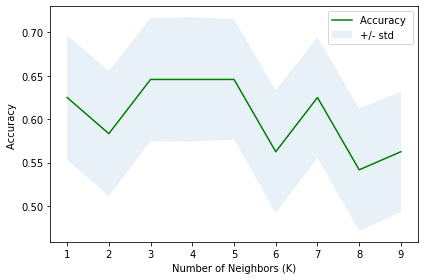

The best accuracy was with 0.6458333333333334 when k= 3


In [48]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print ("The best accuracy was with", mean_acc.max(), "when k=", mean_acc.argmax()+1)

In [49]:
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];   
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n, weights = 'distance', p=2).fit(X_train, y_train.ravel())
    y_hat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)

    
    std_acc[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

for i in range(len(mean_acc)):
    print (f"For K=, {i} The accuracy is: ", mean_acc[i])
    
print ("The best accuracy was with", mean_acc.max(), "when k=", mean_acc.argmax()+1)

For K=, 0 The accuracy is:  0.625
For K=, 1 The accuracy is:  0.625
For K=, 2 The accuracy is:  0.6458333333333334
For K=, 3 The accuracy is:  0.6875
For K=, 4 The accuracy is:  0.6458333333333334
For K=, 5 The accuracy is:  0.6666666666666666
For K=, 6 The accuracy is:  0.625
For K=, 7 The accuracy is:  0.6041666666666666
For K=, 8 The accuracy is:  0.5625
For K=, 9 The accuracy is:  0.5833333333333334
For K=, 10 The accuracy is:  0.6041666666666666
For K=, 11 The accuracy is:  0.625
For K=, 12 The accuracy is:  0.5833333333333334
For K=, 13 The accuracy is:  0.6458333333333334
For K=, 14 The accuracy is:  0.625
For K=, 15 The accuracy is:  0.625
For K=, 16 The accuracy is:  0.625
For K=, 17 The accuracy is:  0.6458333333333334
For K=, 18 The accuracy is:  0.6666666666666666
For K=, 19 The accuracy is:  0.6666666666666666
For K=, 20 The accuracy is:  0.6875
For K=, 21 The accuracy is:  0.6875
For K=, 22 The accuracy is:  0.6875
For K=, 23 The accuracy is:  0.6666666666666666
For K=, 2

### HyperOpt - Optimisation of model hyperparameters

#### Overall Opt for any model

In [50]:
from hpsklearn import HyperoptEstimator, any_classifier, any_preprocessing #any_sparse_classifier
from hyperopt import fmin, tpe

model = HyperoptEstimator(classifier=any_classifier('clf'), 
                          preprocessing=any_preprocessing('pre'), 
                          algo=tpe.suggest, 
                          max_evals=150, trial_timeout=100)

# perform the search
model.fit(X_train, y_train.ravel())

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely
100%|███████████████████████████████████████████████| 66/66 [00:01<00:00,  1.54s/trial, best loss: 0.17948717948717952]


100%|█████████████████████████████████████████████| 134/134 [00:00<00:00,  1.21trial/s, best loss: 0.17948717948717952]


100%|█████████████████████████████████████████████| 150/150 [00:01<00:00,  1.08s/trial, best loss: 0.17948717948717952]


In [51]:
# select the best model

acc = model.score(X_test, y_test)
print("Accuracy: %.3f" % acc)

# the best model details/hyperparameters
print(model.best_model())

Accuracy: 0.688
{'learner': AdaBoostClassifier(algorithm='SAMME', learning_rate=0.04582023925804233,
                   n_estimators=233, random_state=3), 'preprocs': (Normalizer(),), 'ex_preprocs': ()}
